<a href="https://colab.research.google.com/github/adicu7/ChallengeTelecom2/blob/main/ChallengePartDosT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠️ Preparación de los Datos

In [103]:
import requests
import pandas as pd
import ast
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

df = pd.read_csv('desafio1.csv')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7043 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


### Eliminar valores nulos

In [190]:
df.isnull().sum()

,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0
internet_OnlineSecurity,0


In [191]:
    # Eliminar filas con nulos
    df = df.dropna()
    print("\n Filas con valores nulos eliminadas.")


 Filas con valores nulos eliminadas.


### Diccionarios a columnas

In [107]:
#customer
# Convertir string a diccionario
df['customer'] = df['customer'].apply(ast.literal_eval)

# Expandir a columnas nuevas
customer_df = pd.json_normalize(df['customer'])
customer_df.columns = [f'customer_{col}' for col in customer_df.columns]

# Reemplazar columna original por las nuevas
df = pd.concat([df.drop('customer', axis=1), customer_df], axis=1)

In [110]:
# Phone
df['phone'] = df['phone'].apply(ast.literal_eval)

phone_df = pd.json_normalize(df['phone'])
phone_df.columns = [f'phone_{col}' for col in phone_df.columns]

df = pd.concat([df.drop('phone', axis=1), phone_df], axis=1)

In [112]:
# Internet
df['internet'] = df['internet'].apply(ast.literal_eval)

internet_df = pd.json_normalize(df['internet'])
internet_df.columns = [f'internet_{col}' for col in internet_df.columns]

df = pd.concat([df.drop('internet', axis=1), internet_df], axis=1)

In [114]:
# Account
df['account'] = df['account'].apply(ast.literal_eval)

account_df = pd.json_normalize(df['account'])
account_df.columns = [f'account_{col}' for col in account_df.columns]

df = pd.concat([df.drop('account', axis=1), account_df], axis=1)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6620 entries, 0 to 6406
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 6434 non-null   object 
 1   Churn                      6434 non-null   object 
 2   customer_gender            6434 non-null   object 
 3   customer_SeniorCitizen     6434 non-null   float64
 4   customer_Partner           6434 non-null   object 
 5   customer_Dependents        6434 non-null   object 
 6   customer_tenure            6434 non-null   float64
 7   phone_PhoneService         6434 non-null   object 
 8   phone_MultipleLines        6434 non-null   object 
 9   internet_InternetService   6434 non-null   object 
 10  internet_OnlineSecurity    6434 non-null   object 
 11  internet_OnlineBackup      6434 non-null   object 
 12  internet_DeviceProtection  6434 non-null   object 
 13  internet_TechSupport       6434 non-null   object 
 1

In [168]:
# Reemplazar espacios vacíos o strings inválidos por NaN
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')

# Ver cuántos nulos hay después
print("Nulos en Total Charges:", df['account_Charges.Total'].isnull().sum())

Nulos en Total Charges: 0


In [119]:
df = df.dropna(subset=['account_Charges.Total'])

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6237 entries, 0 to 6433
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 6237 non-null   object 
 1   Churn                      6237 non-null   object 
 2   customer_gender            6237 non-null   object 
 3   customer_SeniorCitizen     6237 non-null   float64
 4   customer_Partner           6237 non-null   object 
 5   customer_Dependents        6237 non-null   object 
 6   customer_tenure            6237 non-null   float64
 7   phone_PhoneService         6237 non-null   object 
 8   phone_MultipleLines        6237 non-null   object 
 9   internet_InternetService   6237 non-null   object 
 10  internet_OnlineSecurity    6237 non-null   object 
 11  internet_OnlineBackup      6237 non-null   object 
 12  internet_DeviceProtection  6237 non-null   object 
 13  internet_TechSupport       6237 non-null   object 
 1

In [192]:
#Eliminar columnas que no necesitamos
df = df.drop(columns=['customerID'])

KeyError: "['customerID'] not found in axis"

# 🎯 Correlación y Selección de Variables

In [122]:
#División del dataset en variables (X, y)
# Variable objetivo
df_encoded = df.copy()

y = df_encoded['Churn']

# Variables predictoras (sin la columna 'Churn')
X = df_encoded.drop('Churn', axis=1)

In [123]:
# Ver proporción de Churn

# Conteo absoluto
churn_conteo = df['Churn'].value_counts()
print(" Conteo de clases:")
print(churn_conteo)

# Proporción en porcentaje
churn_proporcion = df['Churn'].value_counts(normalize=True) * 100
print("\n Proporción de clases (%):")
print(churn_proporcion)

# Interpretación clara

print(f"\n Interpretación:")
print(f"{churn_proporcion[1]:.1f}% de los clientes cancelaron.")
print(f"{churn_proporcion[0]:.1f}% de los clientes se quedaron.")

 Conteo de clases:
Churn
No     4569
Yes    1668
Name: count, dtype: int64

 Proporción de clases (%):
Churn
No     73.256373
Yes    26.743627
Name: proportion, dtype: float64

 Interpretación:
26.7% de los clientes cancelaron.
73.3% de los clientes se quedaron.


/tmp/ipython-input-123-2293316098.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{churn_proporcion[1]:.1f}% de los clientes cancelaron.")
/tmp/ipython-input-123-2293316098.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{churn_proporcion[0]:.1f}% de los clientes se quedaron.")


In [124]:
#División en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Dividir 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [125]:
##Codificando columna "Churn" 0 = Yes 1 = No
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [126]:
#Normalización (escalado) de variables numéricas
from sklearn.preprocessing import StandardScaler

# Detectar columnas numéricas
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Escalador
scaler = StandardScaler()

# Ajustar y transformar solo las columnas numéricas
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [157]:
# Primer Intento de codificación.
cat_cols = df.select_dtypes(include='object').columns.tolist()

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

### Encoding: Preferí codificarlos uno por uno, para hacerlo más confiable, ya que la primera vez no me funciono.

In [161]:
df_encoded.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_tenure,internet_OnlineBackup,internet_StreamingTV,account_Charges.Monthly,account_Charges.Total,customer_Partner_Yes,customer_Dependents_Yes,...,internet_TechSupport_No internet service,internet_TechSupport_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,0,0.0,9.0,2,2,65.6,593.30,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,1,0.0,9.0,0,0,59.9,542.40,False,False,...,False,False,False,True,False,False,False,False,False,True
2,1,1,0.0,4.0,0,0,73.9,280.85,False,False,...,False,False,False,False,False,False,True,False,True,False
3,1,1,1.0,13.0,2,2,98.0,1237.85,True,False,...,False,False,False,True,False,False,True,False,True,False
4,1,0,1.0,3.0,0,2,83.9,267.40,True,False,...,False,True,False,False,False,False,True,False,False,True


In [133]:
#Codificando columna "customer_gender"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['customer_gender'] = le.fit_transform(df['customer_gender'])

In [135]:
#Codificando columna "customer_Partner"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['customer_Partner'] = le.fit_transform(df['customer_Partner'])

In [136]:
##Codificando columna "customer_Dependents"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['customer_Dependents'] = le.fit_transform(df['customer_Dependents'])

In [137]:
##Codificando columna "phone_PhoneService" 1 = Yes 0 = No
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['phone_PhoneService'] = le.fit_transform(df['phone_PhoneService'])

In [138]:
##Codificando columna "phone_MultipleLines"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['phone_MultipleLines'] = le.fit_transform(df['phone_MultipleLines'])

In [139]:
##Codificando columna "internet_InternetService"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['internet_InternetService'] = le.fit_transform(df['internet_InternetService'])

In [155]:
##Codificando columna "internet_OnlineBackup"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['internet_OnlineBackup'] = le.fit_transform(df['internet_OnlineBackup'])

In [153]:
##Codificando columna "account_PaymentMethod"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['account_PaymentMethod'] = le.fit_transform(df['account_PaymentMethod'])

In [140]:
##Codificando columna "account_PaperlessBilling"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['account_PaperlessBilling'] = le.fit_transform(df['account_PaperlessBilling'])

In [141]:
##Codificando columna "account_Contract"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['account_Contract'] = le.fit_transform(df['account_Contract'])

In [142]:
##Codificando columna "internet_StreamingMovies"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['internet_StreamingMovies'] = le.fit_transform(df['internet_StreamingMovies'])

In [144]:
##Codificando columna "internet_StreamingTV"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['internet_StreamingTV'] = le.fit_transform(df['internet_StreamingTV'])

In [145]:
##Codificando columna "internet_TechSupport"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['internet_TechSupport'] = le.fit_transform(df['internet_TechSupport'])

In [146]:
##Codificando columna "internet_DeviceProtection"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['internet_DeviceProtection'] = le.fit_transform(df['internet_DeviceProtection'])

In [147]:
##Codificando columna "internet_OnlineSecurity"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['internet_OnlineSecurity'] = le.fit_transform(df['internet_OnlineSecurity'])

In [148]:
df_encoded.replace({'Yes': 1, 'No': 0}, inplace=True)

/tmp/ipython-input-148-414952267.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded.replace({'Yes': 1, 'No': 0}, inplace=True)


In [152]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6237 entries, 0 to 6433
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      6237 non-null   int64  
 1   customer_gender            6237 non-null   int64  
 2   customer_SeniorCitizen     6237 non-null   float64
 3   customer_Partner           6237 non-null   int64  
 4   customer_Dependents        6237 non-null   int64  
 5   customer_tenure            6237 non-null   float64
 6   phone_PhoneService         6237 non-null   int64  
 7   phone_MultipleLines        6237 non-null   int64  
 8   internet_InternetService   6237 non-null   int64  
 9   internet_OnlineSecurity    6237 non-null   int64  
 10  internet_OnlineBackup      6237 non-null   object 
 11  internet_DeviceProtection  6237 non-null   int64  
 12  internet_TechSupport       6237 non-null   int64  
 13  internet_StreamingTV       6237 non-null   int64  
 1

##Análisis de Correlación

In [158]:
# Matriz de correlación
corr_matrix = df_encoded.corr()

# Filtro para mostrar correlación con 'Churn' en orden descendente
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)

Churn                                            1.000000
account_PaymentMethod_Mailed check               0.024395
internet_StreamingTV                             0.019489
internet_InternetService_No                      0.013323
internet_TechSupport_No internet service         0.013323
internet_OnlineSecurity_No internet service      0.013323
internet_StreamingMovies_No internet service     0.013323
internet_DeviceProtection_No internet service    0.013323
phone_PhoneService_Yes                           0.011624
internet_InternetService_Fiber optic             0.008727
internet_DeviceProtection_Yes                    0.006255
customer_Dependents_Yes                          0.005568
phone_MultipleLines_Yes                          0.003602
customer_Partner_Yes                             0.000687
account_Charges.Monthly                         -0.001792
account_PaperlessBilling_Yes                    -0.001947
account_Contract_Two year                       -0.004032
account_Paymen

In [160]:
df_encoded.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_tenure,internet_OnlineBackup,internet_StreamingTV,account_Charges.Monthly,account_Charges.Total,customer_Partner_Yes,customer_Dependents_Yes,...,internet_TechSupport_No internet service,internet_TechSupport_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,0,0.0,9.0,2,2,65.6,593.30,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,1,0.0,9.0,0,0,59.9,542.40,False,False,...,False,False,False,True,False,False,False,False,False,True
2,1,1,0.0,4.0,0,0,73.9,280.85,False,False,...,False,False,False,False,False,False,True,False,True,False
3,1,1,1.0,13.0,2,2,98.0,1237.85,True,False,...,False,False,False,True,False,False,True,False,True,False
4,1,0,1.0,3.0,0,2,83.9,267.40,True,False,...,False,True,False,False,False,False,True,False,False,True


In [ ]:
#Visualizar con un mapa de calor

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación")
plt.show()

📊 Análisis de la correlación con Churn
🔺 Variables más positivamente correlacionadas (aunque débilmente):
account_PaymentMethod_3: 0.024

internet_DeviceProtection_1, StreamingTV_1, OnlineBackup_1, etc.: ~0.013

Estas tienen una correlación ligera y positiva, pero son demasiado bajas para ser consideradas influyentes por sí solas.

🔻 Variables más negativamente correlacionadas:
account_Contract_1: -0.0247

internet_TechSupport_2: -0.0201

customer_tenure: -0.0181

customer_gender_1: -0.0179

Aunque estas correlaciones también son pequeñas, algunas tienen sentido lógico:

Clientes con contrato de 1 año o más (Contract_1) tienden menos a cancelar.

A mayor tenure, menor probabilidad de cancelación.

⚠️ Conclusión clave:
Ninguna variable tiene una correlación fuerte (> 0.3) con Churn, lo cual es común en problemas de clasificación de comportamiento de clientes. En estos casos, los modelos de ML son más útiles porque pueden capturar relaciones no lineales o combinadas que la correlación simple no detecta.

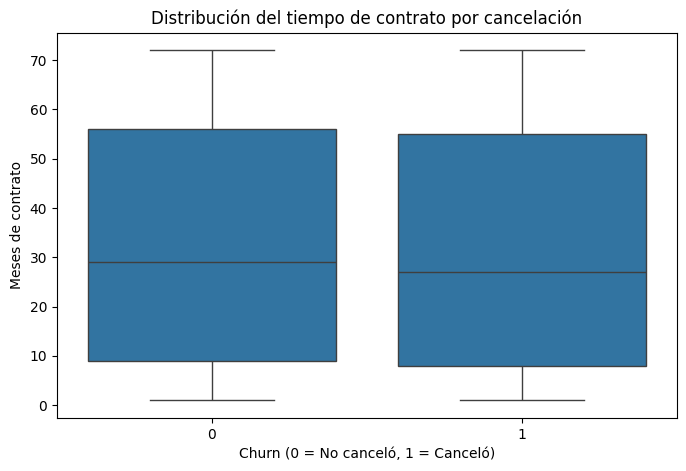

In [193]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='customer_tenure', data=df)
plt.title('Distribución del tiempo de contrato por cancelación')
plt.xlabel('Churn (0 = No canceló, 1 = Canceló)')
plt.ylabel('Meses de contrato')
plt.show()

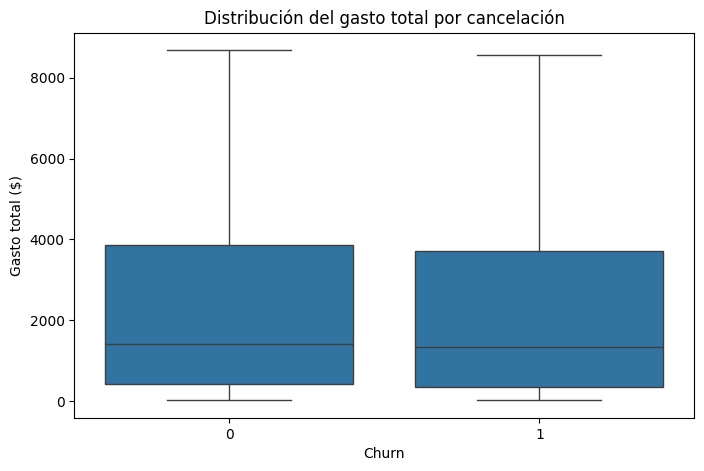

In [194]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='account_Charges.Total', data=df)
plt.title('Distribución del gasto total por cancelación')
plt.xlabel('Churn')
plt.ylabel('Gasto total ($)')
plt.show()

# 🤖 Modelado Predictivo

In [177]:
from sklearn.model_selection import train_test_split

# Variables predictoras y objetivo
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# División del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,     # 20% para prueba
                                                    random_state=42,   # para reproducibilidad
                                                    stratify=y)        # mantiene proporción de clases


In [178]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_log = log_model.predict(X_test_scaled)

# Evaluación
print("🔹 Regresión Logística:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

🔹 Regresión Logística:
[[914   0]
 [334   0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       914
           1       0.00      0.00      0.00       334

    accuracy                           0.73      1248
   macro avg       0.37      0.50      0.42      1248
weighted avg       0.54      0.73      0.62      1248



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [180]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluación
print("🔸 Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🔸 Random Forest:
[[870  44]
 [317  17]]
              precision    recall  f1-score   support

           0       0.73      0.95      0.83       914
           1       0.28      0.05      0.09       334

    accuracy                           0.71      1248
   macro avg       0.51      0.50      0.46      1248
weighted avg       0.61      0.71      0.63      1248



 Métricas de evaluación

🔹 Regresión Logística
Exactitud: 0.7323717948717948
Precisión: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


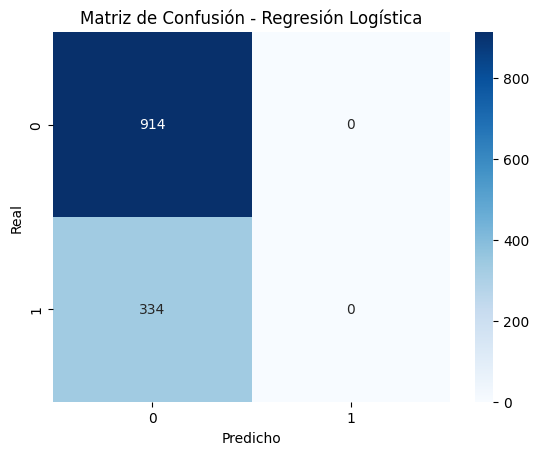

In [181]:
# Predicciones ya generadas: y_pred_log
print("🔹 Regresión Logística")

# Métricas
print("Exactitud:", accuracy_score(y_test, y_pred_log))
print("Precisión:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))

# Matriz de confusión
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

🔸 Random Forest
Exactitud: 0.7107371794871795
Precisión: 0.2786885245901639
Recall: 0.05089820359281437
F1-score: 0.08607594936708861


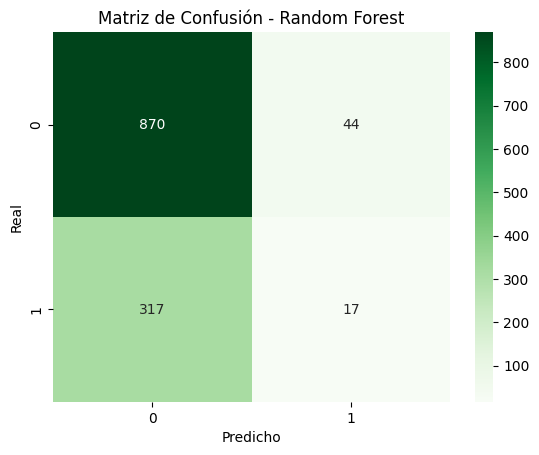

In [182]:
# Predicciones ya generadas: y_pred_rf
print("🔸 Random Forest")

# Métricas
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("Precisión:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

Análisis crítico y comparación
Tras correr el código, responde estas preguntas basándote en los resultados:

📊 Comparación de métricas:
Métrica	Reg. Logística	Random Forest
Exactitud	…	…
Precisión	…	…
Recall	…	…
F1-score	…	…

⚠️ El recall en "1" (cancelaciones) es muy importante en este caso, porque perder clientes es costoso y queremos detectar quienes están en riesgo de cancelar.



📋 Interpretación y Conclusiones

🔹 1. Regresión Logística — Coeficientes
Este modelo asigna un coeficiente a cada variable:

Coeficiente positivo: Aumenta la probabilidad de cancelación.

Coeficiente negativo: Disminuye la probabilidad.

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar solo X (porque Regresión Logística lo requiere)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

                                         Variable  Coeficiente
5                         account_Charges.Monthly     0.483760
18       internet_TechSupport_No internet service     0.054040
14    internet_OnlineSecurity_No internet service     0.054040
13                    internet_InternetService_No     0.054040
16  internet_DeviceProtection_No internet service     0.054040
20   internet_StreamingMovies_No internet service     0.054040
27             account_PaymentMethod_Mailed check     0.041523
10           phone_MultipleLines_No phone service     0.038520
8                         customer_Dependents_Yes     0.032294
7                            customer_Partner_Yes     0.031963


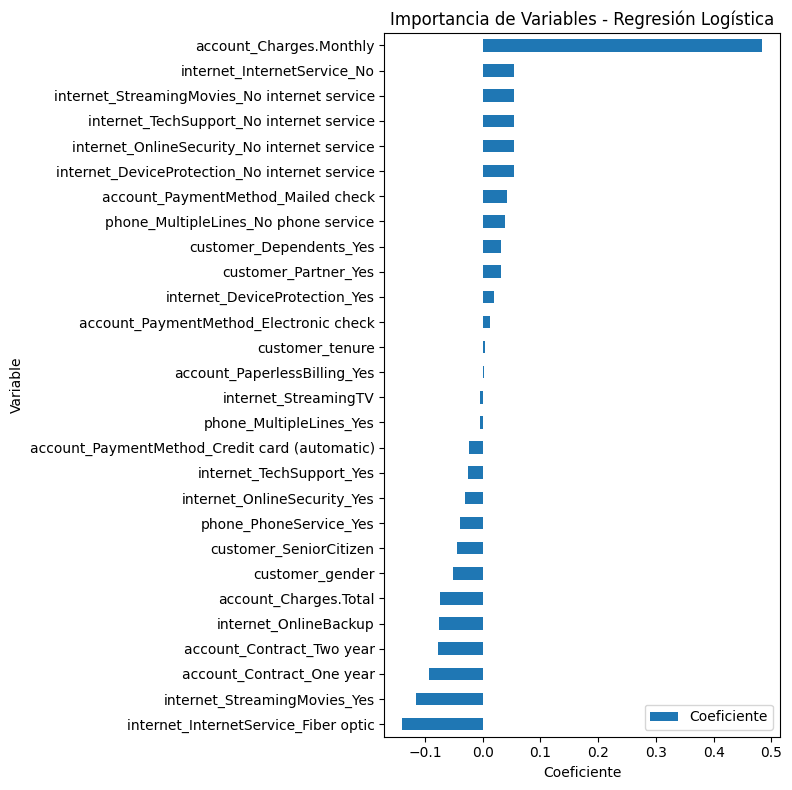

In [184]:
coef = logistic_model.coef_[0]
features = X.columns  # O usa X_train.columns si está disponible

importance_df = pd.DataFrame({'Variable': features, 'Coeficiente': coef})
importance_df = importance_df.sort_values(by='Coeficiente', ascending=False)

# Mostrar
print(importance_df.head(10))

# Gráfico
importance_df.set_index('Variable').sort_values(by='Coeficiente').plot(kind='barh', figsize=(8,8))
plt.title('Importancia de Variables - Regresión Logística')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()



###Random Forest — Importancia de variables
Este modelo evalúa cuánto ayuda cada variable a dividir los datos correctamente

In [185]:
importances = rf_model.feature_importances_
features = X_train.columns

rf_importance_df = pd.DataFrame({'Variable': features, 'Importancia': importances})
rf_importance_df = rf_importance_df.sort_values(by='Importancia', ascending=False)

print(rf_importance_df.head(10))


                                  Variable  Importancia
6                    account_Charges.Total     0.221577
5                  account_Charges.Monthly     0.217307
2                          customer_tenure     0.163667
24            account_PaperlessBilling_Yes     0.032074
0                          customer_gender     0.031707
7                     customer_Partner_Yes     0.030606
8                  customer_Dependents_Yes     0.027517
26  account_PaymentMethod_Electronic check     0.023036
11                 phone_MultipleLines_Yes     0.022598
1                   customer_SeniorCitizen     0.022444


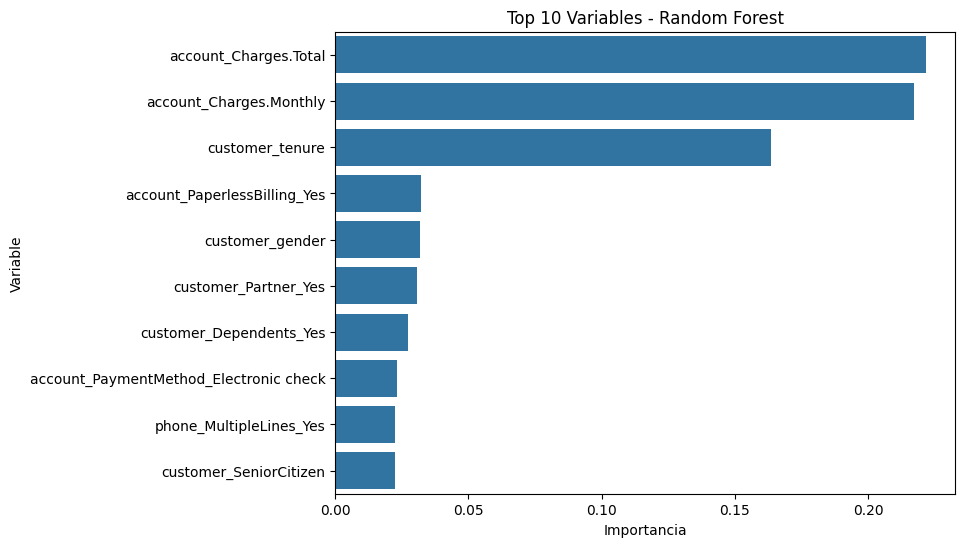

In [186]:
plt.figure(figsize=(8,6))
sns.barplot(x='Importancia', y='Variable', data=rf_importance_df.head(10))
plt.title('Top 10 Variables - Random Forest')
plt.show()

###KNN – No tiene importancia directa de variables
El modelo KNN no proporciona coeficientes ni pesos, ya que la predicción depende de la distancia entre puntos. Pero puedes:

✅ Usar técnicas como permutation importance o SelectKBest con f_classif para evaluar qué variables más afectan la clasificación:

In [187]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)

knn_importance_df = pd.DataFrame({
    'Variable': X_train.columns,
    'F_Score': selector.scores_
}).sort_values(by='F_Score', ascending=False)

print(knn_importance_df.head(10))


                                         Variable   F_Score
2                                 customer_tenure  6.944887
22                      account_Contract_One year  4.659363
6                           account_Charges.Total  4.640106
3                           internet_OnlineBackup  4.149352
25  account_PaymentMethod_Credit card (automatic)  3.154449
15                    internet_OnlineSecurity_Yes  2.598676
27             account_PaymentMethod_Mailed check  2.322458
23                      account_Contract_Two year  2.013757
19                       internet_TechSupport_Yes  1.987129
0                                 customer_gender  1.978536
